In [1]:
import pandas as pd
import json
from urllib.request import urlopen 
import yfinance as yf 
from datetime import datetime 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from string import ascii_letters

In [2]:
#Pulling Bitcoin's price history

btc_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&api_key=d1875a3943f6f2ee83a90ac2e05d5fa018618e00724e9018f9bd08c0ac932cc6"
btc_data = urlopen(btc_url).read() #Open the API contents 
btc_json = json.loads(btc_data) #Transform the contents of our response into a manageable JSON format


In [3]:
#Transform Bitcoin data so we can run analysis

btc_price = btc_json['Data']['Data'] ##Extract only the relevant data from the JSON variable we created earlier
btc_df = pd.DataFrame(btc_price) ##Convert the json format into a Pandas dataframe so we can make it easier to work with


In [4]:
btc_df['btc_returns'] = ((btc_df['close']/btc_df['open']) - 1) * 100 #We create a coloumn for daily returns of Bitcoin that we'll need for later when we calculate the correlation. 
btc_df['Date'] = btc_df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d')) #Formatting the date into a human-readable format
# btc_df.set_index("Date", drop = True, inplace = True)
btc_df.set_index(pd.to_datetime(btc_df['Date'], infer_datetime_format=True), inplace=True)


In [5]:
btc_returns = btc_df[['btc_returns']] #In this line, we select the only 2 columns we'll need for our correlation calculations namely the Date and the Return
# btc_returns.set_index("Date", drop = True, inplace = True)
btc_returns = btc_returns.dropna()
btc_returns.head()

,btc_returns
Date,
2016-02-10,1.747842
2016-02-11,-0.636326
2016-02-12,1.209646
2016-02-13,1.577961
2016-02-14,3.947706


In [6]:
#Pulling S&P500's price history

spy = yf.Ticker("SPY")
spy_df = spy.history(start="2019-01-01", end="2021-07-31")
spy_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,439.309998,441.029999,439.260010,441.019989,43719200,0.0,0
2021-07-27,439.910004,439.940002,435.989990,439.010010,67397100,0.0,0
2021-07-28,439.679993,440.299988,437.309998,438.829987,52472400,0.0,0
2021-07-29,439.820007,441.799988,439.809998,440.649994,47435300,0.0,0
2021-07-30,437.910004,440.059998,437.769989,438.510010,68890600,0.0,0


In [7]:
#Transform S&P500 data so we can run analysis

#spy_df = spy_df.reset_index() #In the original dataframe, the date is part of the index which means we can't select it later. reset_index shifts the date into a normal column
#spy_df['Date'] = spy_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) 
spy_df['spy_returns'] = ((spy_df['Close']/spy_df['Open']) - 1) * 100
spy_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,spy_returns
Date,,,,,,,,
2019-01-02,235.439211,240.445104,235.410497,239.459229,126925200,0.0,0,1.707455
2019-01-03,237.592780,237.918221,233.228188,233.745056,144140700,0.0,0,-1.619461
2019-01-04,236.980182,242.263641,236.578182,241.574493,142628800,0.0,0,1.938690
2019-01-07,241.861681,244.981978,240.904533,243.479263,103139100,0.0,0,0.668805
2019-01-08,245.814721,246.283714,243.115557,245.766846,102512600,0.0,0,-0.019476
...,...,...,...,...,...,...,...,...
2021-07-26,439.309998,441.029999,439.260010,441.019989,43719200,0.0,0,0.389245
2021-07-27,439.910004,439.940002,435.989990,439.010010,67397100,0.0,0,-0.204586
2021-07-28,439.679993,440.299988,437.309998,438.829987,52472400,0.0,0,-0.193324


In [8]:
spy_returns = spy_df[['spy_returns']]
spy_returns = spy_returns.dropna()
spy_returns.head()

,spy_returns
Date,
2019-01-02,1.707455
2019-01-03,-1.619461
2019-01-04,1.938690
2019-01-07,0.668805
2019-01-08,-0.019476


In [9]:
#Pulling gold's price history

gold = yf.Ticker("GC=F")
gold_df = gold.history(start="2019-01-01", end="2021-07-31")
gold_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,1802.500000,1802.500000,1797.199951,1798.699951,17,0,0
2021-07-27,1803.699951,1803.699951,1799.500000,1799.500000,1,0,0
2021-07-28,1799.500000,1799.500000,1799.500000,1799.500000,209783,0,0
2021-07-29,1806.599976,1832.599976,1806.099976,1831.199951,30496,0,0
2021-07-30,1828.000000,1830.500000,1808.900024,1812.599976,30496,0,0


In [10]:
#Transform gold data so we can run analysis

gold_df['gold_returns'] = ((gold_df['Close']/gold_df['Open']) - 1) * 100 
gold_returns = gold_df[['gold_returns']]
gold_returns = gold_returns.dropna()
gold_returns.tail()

,gold_returns
Date,
2021-07-26,-0.210821
2021-07-27,-0.232852
2021-07-28,0.000000
2021-07-29,1.361673
2021-07-30,-0.842452


In [11]:
#Pulling NASDAQs price history (QQQ)

qqq = yf.Ticker("QQQ")
qqq_df = qqq.history(start="2019-01-01", end="2021-07-31")
qqq_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,367.489990,368.890015,366.600006,368.489990,28438100,0.0,0
2021-07-27,368.220001,368.220001,360.160004,364.429993,57933100,0.0,0
2021-07-28,365.600006,367.450012,363.239990,365.829987,42066200,0.0,0
2021-07-29,365.250000,367.679993,365.250000,366.480011,25672500,0.0,0
2021-07-30,362.440002,365.170013,362.410004,364.570007,36463500,0.0,0


In [12]:
#Transform gold data so we can run analysis

# qqq_df = qqq_df.reset_index()
# qqq_df['Date'] = qqq_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
qqq_df['qqq_returns'] = ((qqq_df['Close']/qqq_df['Open']) - 1) * 100 
qqq_returns = qqq_df[['qqq_returns']]
qqq_returns = qqq_returns.dropna()
qqq_returns.tail()

,qqq_returns
Date,
2021-07-26,0.272116
2021-07-27,-1.029278
2021-07-28,0.062905
2021-07-29,0.336759
2021-07-30,0.587685


In [13]:
#Pulling AA price history

aal = yf.Ticker("AAL")
aal_df = aal.history(start="2019-01-01", end="2021-07-31")
aal_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,21.030001,22.110001,20.940001,22.080000,31508800,0.0,0
2021-07-27,21.959999,22.160000,21.110001,21.459999,30301300,0.0,0
2021-07-28,21.610001,21.790001,21.230000,21.629999,20077400,0.0,0
2021-07-29,21.780001,21.780001,21.170000,21.170000,19391300,0.0,0
2021-07-30,20.840000,21.150000,20.240000,20.379999,31201900,0.0,0


In [14]:
#Transform Amazon data so we can run analysis

# amzn_df = amzn_df.reset_index()
# amzn_df['Date'] = amzn_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
aal_df['aal_returns'] = ((aal_df['Close']/aal_df['Open']) - 1) * 100 
aal_returns = aal_df[['aal_returns']]
aal_returns = aal_returns.dropna()
aal_returns.tail()

,aal_returns
Date,
2021-07-26,4.992864
2021-07-27,-2.276867
2021-07-28,0.092543
2021-07-29,-2.800737
2021-07-30,-2.207298


In [15]:
#Pulling Visa price history 

v = yf.Ticker("V")
v_df = v.history(start="2019-01-01", end="2021-07-31")
v_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,249.210007,250.360001,247.699997,250.250000,4879000,0.0,0
2021-07-27,249.190002,252.669998,248.220001,250.929993,7038300,0.0,0
2021-07-28,250.050003,251.500000,245.910004,246.940002,9036500,0.0,0
2021-07-29,248.110001,250.380005,247.100006,247.919998,7495300,0.0,0
2021-07-30,247.210007,248.460007,246.000000,246.389999,5804200,0.0,0


In [16]:
#Transform Visa data so we can run analysis

# v_df = v_df.reset_index()
# v_df['Date'] = v_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
v_df['v_returns'] = ((v_df['Close']/v_df['Open']) - 1) * 100 
v_returns = v_df[['v_returns']]
v_returns = v_returns.dropna()
v_returns.tail()

,v_returns
Date,
2021-07-26,0.417316
2021-07-27,0.698258
2021-07-28,-1.243751
2021-07-29,-0.076580
2021-07-30,-0.331705


In [17]:
#Pulling TESLA price history 

tsla = yf.Ticker("TSLA")
tsla_df = tsla.history(start="2019-01-01", end="2021-07-31")
tsla_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,650.969971,668.200012,647.109985,657.619995,25336600,0,0.0
2021-07-27,663.400024,666.500000,627.239990,644.780029,32813300,0,0.0
2021-07-28,647.000000,654.969971,639.400024,646.979980,16006600,0,0.0
2021-07-29,649.789978,683.690002,648.799988,677.349976,30394600,0,0.0
2021-07-30,671.760010,697.530029,669.000000,687.200012,29600500,0,0.0


In [18]:
#Transform TESLA data so we can run analysis

# tsla_df = tsla_df.reset_index()
# tsla_df = tsla_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
tsla_df['tsla_returns'] = ((tsla_df['Close']/tsla_df['Open']) - 1) * 100 
tsla_returns = tsla_df[['tsla_returns']]
tsla_returns = tsla_returns.dropna()
tsla_returns.tail()

,tsla_returns
Date,
2021-07-26,1.021556
2021-07-27,-2.806752
2021-07-28,-0.003094
2021-07-29,4.241370
2021-07-30,2.298440


In [19]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)

combined_returns_df = pd.concat([btc_returns, spy_returns, gold_returns, qqq_returns, aal_returns, v_returns, tsla_returns], axis='columns')
#combined_returns_df = combined_returns_df.reset_index()
combined_returns_df = combined_returns_df.dropna()
combined_returns_df.tail()

,btc_returns,spy_returns,gold_returns,qqq_returns,aal_returns,v_returns,tsla_returns
Date,,,,,,,
2021-07-26,5.370635,0.389245,-0.210821,0.272116,4.992864,0.417316,1.021556
2021-07-27,5.975848,-0.204586,-0.232852,-1.029278,-2.276867,0.698258,-2.806752
2021-07-28,1.350290,-0.193324,0.000000,0.062905,0.092543,-1.243751,-0.003094
2021-07-29,0.001274,0.188711,1.361673,0.336759,-2.800737,-0.076580,4.241370
2021-07-30,5.499079,0.137016,-0.842452,0.587685,-2.207298,-0.331705,2.298440


In [20]:
# Checking the Validity of our Combined Returns Data. 
combined_returns_df.isnull()

,btc_returns,spy_returns,gold_returns,qqq_returns,aal_returns,v_returns,tsla_returns
Date,,,,,,,
2019-01-02,False,False,False,False,False,False,False
2019-01-03,False,False,False,False,False,False,False
2019-01-04,False,False,False,False,False,False,False
2019-01-07,False,False,False,False,False,False,False
2019-01-08,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2021-07-26,False,False,False,False,False,False,False
2021-07-27,False,False,False,False,False,False,False
2021-07-28,False,False,False,False,False,False,False


In [21]:
# columns = ['Bitcoin', 'S&P 500','GOLD', 'NASDAQ', 'AMAZON' ,'VISA' ,'TESLA']
combined_returns_df = combined_returns_df.rename(columns = { "btc_returns": "BITCOIN", "spy_returns": "S&P 500", "gold_returns": "GOLD","qqq_returns":"NASDAQ", "aal_returns":"AMERICAN AIRLINES", "v_returns":"VISA", "tsla_returns":"TESLA" })
combined_returns_df = combined_returns_df.dropna()
combined_returns_df                                      

,BITCOIN,S&P 500,GOLD,NASDAQ,AMERICAN AIRLINES,VISA,TESLA
Date,,,,,,,
2019-01-02,2.083940,1.707455,-0.388802,2.576329,3.242214,2.246152,1.313291
2019-01-03,-3.159548,-1.619461,0.388561,-1.821755,-5.143582,-2.347383,-2.162871
2019-01-04,0.995865,1.938690,-0.888580,2.553498,5.256243,2.460895,3.820257
2019-01-07,-1.278380,0.668805,0.000000,0.938578,3.000941,1.197472,4.115372
2019-01-08,-0.238248,-0.019476,0.210851,-0.012529,-2.817753,-0.848009,-1.932973
...,...,...,...,...,...,...,...
2021-07-26,5.370635,0.389245,-0.210821,0.272116,4.992864,0.417316,1.021556
2021-07-27,5.975848,-0.204586,-0.232852,-1.029278,-2.276867,0.698258,-2.806752
2021-07-28,1.350290,-0.193324,0.000000,0.062905,0.092543,-1.243751,-0.003094


In [22]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = combined_returns_df.corr()
correlation

,BITCOIN,S&P 500,GOLD,NASDAQ,AMERICAN AIRLINES,VISA,TESLA
BITCOIN,1.000000,0.171408,0.125438,0.184091,-0.007091,0.085010,0.119946
S&P 500,0.171408,1.000000,0.029450,0.890683,0.286945,0.725572,0.312023
GOLD,0.125438,0.029450,1.000000,0.040297,0.043761,-0.015187,0.061192
NASDAQ,0.184091,0.890683,0.040297,1.000000,0.126099,0.644362,0.464516
AMERICAN AIRLINES,-0.007091,0.286945,0.043761,0.126099,1.000000,0.199881,0.147155
VISA,0.085010,0.725572,-0.015187,0.644362,0.199881,1.000000,0.217761
TESLA,0.119946,0.312023,0.061192,0.464516,0.147155,0.217761,1.000000


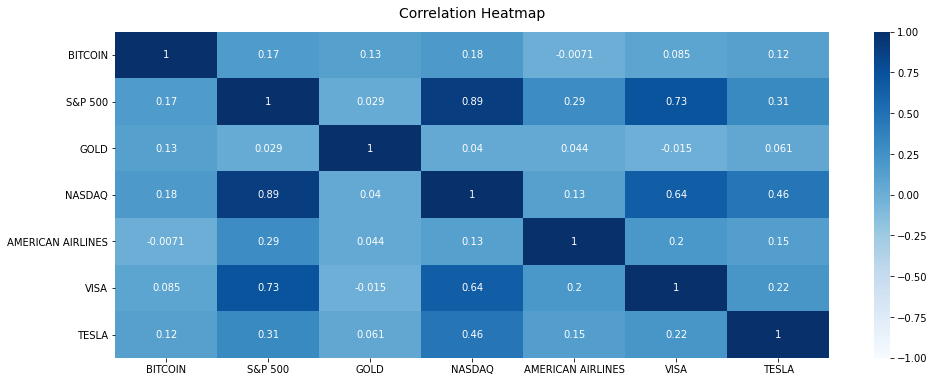

In [23]:
# Create a heatmap from the correlation values
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="Blues")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);


<AxesSubplot:>

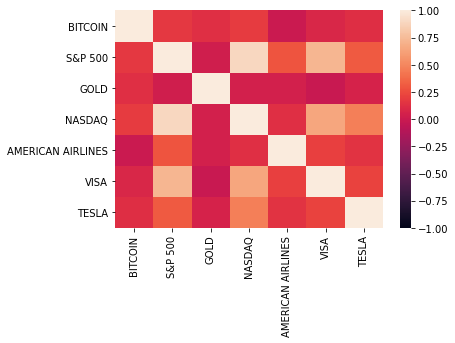

In [27]:
sns.heatmap(correlation, vmin=-1, vmax=1)

AttributeError: module 'seaborn' has no attribute 'plot'

In [24]:
def calculate_correlation(assetA_df,assetB_df):
    joint_df = pd.merge(assetA_df,assetB_df, left_index=True, right_index=True) #pd.merge combines the two datafames into a single df.
    correlation = joint_df.iloc[:,1].rolling(180).corr(joint_df.iloc[:,1])
    return correlation

correlation_btc_spy = calculate_correlation(btc_returns,spy_returns) 
correlation_btc_gold = calculate_correlation(btc_returns,gold_returns) 
correlation_btc_qqq = calculate_correlation(btc_returns, qqq_returns)
correlation_btc_amzn = calculate_correlation(btc_returns, amzn_returns)
correlation_btc_v = calculate_correlation(btc_returns, v_returns)
correlation_btc_tsla = calculate_correlation(btc_returns, tsla_returns)

print ("The correlation between Bitcoin and GOLD is " + str(correlation_btc_gold.iloc[-1]))
print ("The correlation between Bitcoin and S&P 500 is " + str(correlation_btc_spy.iloc[-1]))
print ("The correlation between Bitcoin and NASDAQ (QQQ) is " + str(correlation_btc_qqq.iloc[-1]))
print ("The correlation between Bitcoin and AMAZON is " + str(correlation_btc_amzn.iloc[-1]))
print ("The correlation between Bitcoin and VISA is " + str(correlation_btc_v.iloc[-1]))
print ("The correlation between Bitcoin and TESLA is " + str(correlation_btc_tsla.iloc[-1]))

NameError: name 'amzn_returns' is not defined